# Leaf Dataset Classification

Dominik Tyszkowski 68033<br/>
Statistical Learning Methods<br/>
Group 102<br/>

Dataset link is located [here](https://archive.ics.uci.edu/ml/datasets/Leaf#).


## Table of contents

<span><a href="#Introduction-to-Dataset" data-toc-modified-id="Introduction to Dataset-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Introduction to Dataset<br/>
<span><a href="#Project-description" data-toc-modified-id="Project description-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Project description<br/>
<span><a href="#Cleaning-and-preprocessing-data" data-toc-modified-id="Cleaning and preprocessing data-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Cleaning and preprocessing data<br/>
<span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory Data Analysis-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Exploratory Data Analysis<br/>
<span><a href="#Classification-models" data-toc-modified-id="Classification models-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Classification models<br/>
<span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6.&nbsp;&nbsp;</span>Summary<br/>   

## Libraries used

In [1]:
import pandas as pd
import numpy as np
import tabulate
import sklearn
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Introduction to Dataset

Leaf dataset consists of a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 36 different plant species. Species numbered from 1 to 15 and from 22 to 36 exhibit simple leaves and species numbered from 16 to 21 have complex leaves.

In [2]:
plant = pd.DataFrame({
    'Class': range(1,37),
    'Scientific_name': ['Quercus suber', 'Salix atrocinera', 'Populus nigra', 'Alnus sp.',
            'Quercus robur', 'Crataegus monogyna', 'Ilex aquifolium', 'Nerium oleander',
            'Betula pubescens', 'Tilia tomentosa', 'Acer palmatum', 'Celtis sp.',
            'Corylus avellana', 'Castanea sativa', 'Populus alba', 'Acer negundo',
            'Taxus bacatta', 'Papaver sp.', 'Polypolium vulgare', 'Pinus sp.',
            'Fraxinus sp.', 'Primula vulgaris', 'Erodium sp.', 'Bougainvillea sp.',
            'Arisarum vulgare', 'Euonymus japonicus', 'Ilex perado ssp. azorica',  'Magnolia soulangeana',
            'Buxus sempervirens', 'Urtica dioica', 'Podocarpus sp.', 'Acca sellowiana',
            'Hydrangea sp.', 'Pseudosasa japonica', 'Magnolia grandiﬂora', 'Geranium sp.' ],
    'Leaves_type': 'Single' })

plant.loc[plant['Class'] > 15, 'Leaves_type'] = 'Complex'
plant.loc[plant['Class'] > 21, 'Leaves_type'] = 'Single'

plant = plant.set_index('Class')

print(plant)

                Scientific_name Leaves_type
Class                                      
1                 Quercus suber      Single
2              Salix atrocinera      Single
3                 Populus nigra      Single
4                     Alnus sp.      Single
5                 Quercus robur      Single
6            Crataegus monogyna      Single
7               Ilex aquifolium      Single
8               Nerium oleander      Single
9              Betula pubescens      Single
10              Tilia tomentosa      Single
11                Acer palmatum      Single
12                   Celtis sp.      Single
13             Corylus avellana      Single
14              Castanea sativa      Single
15                 Populus alba      Single
16                 Acer negundo     Complex
17                Taxus bacatta     Complex
18                  Papaver sp.     Complex
19           Polypolium vulgare     Complex
20                    Pinus sp.     Complex
21                 Fraxinus sp. 

The dataset has 340 observations. Each one consists 16 variables which you can divide into 3 groups:<br/>

        - Class and number of specimens available of each plant (Columns 1-2).
        - Attributes describing shape (columns 3-10).
        - Attributes describing texture (columns 11-16).

In [3]:
leaf = pd.read_csv('leaf.csv', names = ['Class','Spec_Num','Ecc','Asp_R','Elong','Solid','Stoch_Conv',
'Isom_F','Max_Ind','Lob','Avg_Int','Avg_Con','Smooth',
'Third_Mom','Unif','Entr'])

print('Number of variables in dataset:', np.shape(leaf)[1])
print('Number of observations in dataset:', np.shape(leaf)[0]) 

print('\nName of variables used in dataset:','\n','\n',list(leaf.columns[:8]),'\n',list(leaf.columns[8:]),'\n')

HTML(leaf.head().to_html(index=False))

Number of variables in dataset: 16
Number of observations in dataset: 340

Name of variables used in dataset: 
 
 ['Class', 'Spec_Num', 'Ecc', 'Asp_R', 'Elong', 'Solid', 'Stoch_Conv', 'Isom_F'] 
 ['Max_Ind', 'Lob', 'Avg_Int', 'Avg_Con', 'Smooth', 'Third_Mom', 'Unif', 'Entr'] 



Class,Spec_Num,Ecc,Asp_R,Elong,Solid,Stoch_Conv,Isom_F,Max_Ind,Lob,Avg_Int,Avg_Con,Smooth,Third_Mom,Unif,Entr
1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


#### Class and number of specimens available of each plant

Class 1 with Single leaves has 12 specimens.
Class 2 with Single leaves has 10 specimens.
Class 3 with Single leaves has 10 specimens.
Class 4 with Single leaves has 8 specimens.
Class 5 with Single leaves has 12 specimens.
Class 6 with Single leaves has 8 specimens.
Class 7 with Single leaves has 10 specimens.
Class 8 with Single leaves has 11 specimens.
Class 9 with Single leaves has 14 specimens.
Class 10 with Single leaves has 13 specimens.
Class 11 with Single leaves has 16 specimens.
Class 12 with Single leaves has 12 specimens.
Class 13 with Single leaves has 13 specimens.
Class 14 with Single leaves has 12 specimens.
Class 15 with Single leaves has 10 specimens.
Class 16 with Complex leaves has 0 specimens.
Class 17 with Complex leaves has 0 specimens.
Class 18 with Complex leaves has 0 specimens.
Class 19 with Complex leaves has 0 specimens.
Class 20 with Complex leaves has 0 specimens.
Class 21 with Complex leaves has 0 specimens.
Class 22 with Single leaves has 12 specimens.

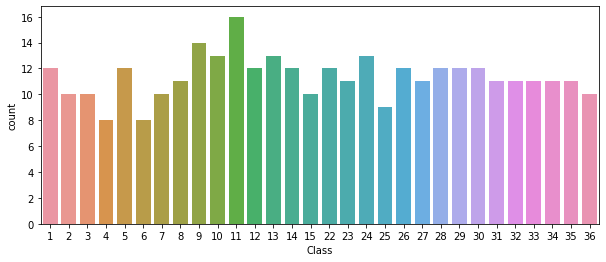

In [4]:
for i in range(1,37):
        x = leaf[leaf['Class'] == i].count()['Class']
        l = plant['Leaves_type'][i]
        print('Class', i, 'with', l, 'leaves has', x, 'specimens.')
        
plt.rcParams['figure.figsize'] = [10,4]
sns.countplot(leaf['Class'],label="Count")
plt.show()

As we can see, we will analyze classes with single leaves only. Our dataset does not contain any complex leaves type class. Moreover, the data we analize is balanced.

#### Attributes describing shape

In [5]:
shape = pd.DataFrame({
    'Variable': list(leaf.columns[2:10]),
    'Feature': ['Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity',
            'Stochastic Convexity', 'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness'] })

shape = shape.set_index('Variable')

print('\nShape features in dataset:')

display(HTML(tabulate.tabulate(shape, tablefmt='html', headers = ['Variable', 'Feature'])))


Shape features in dataset:


Variable,Feature
Ecc,Eccentricity
Asp_R,Aspect Ratio
Elong,Elongation
Solid,Solidity
Stoch_Conv,Stochastic Convexity
Isom_F,Isoperimetric Factor
Max_Ind,Maximal Indentation Depth
Lob,Lobedness


#### Attributes describing texture

In [6]:
texture = pd.DataFrame({
    'Variable': list(leaf.columns[10:]),
    'Feature': ['Average Intensity', 'Average Contrast', 'Smoothness', 'Third moment', 'Uniformity', 'Entropy'] })

texture = texture.set_index('Variable')

print('\nTexture features in dataset:')

display(HTML(tabulate.tabulate(texture, tablefmt='html', headers = ['Variable', 'Feature'])))


Texture features in dataset:


Variable,Feature
Avg_Int,Average Intensity
Avg_Con,Average Contrast
Smooth,Smoothness
Third_Mom,Third moment
Unif,Uniformity
Entr,Entropy


## Project description

The goal of project is to prepare classification analysis of above-mentioned dataset. At the beginning I would like to explain what classification is.

In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. Classification is a type of supervised learning which means the data fed to the network is already labeled, with the important features/attributes already separated into distinct categories beforehand.

Classification can be broken down into two areas:

        - Binary classification, where we wish to group an outcome into one of two groups.
        - Multi-class classification, where we wish to group an outcome into one of multiple (more than two) groups.  

The following methods are used in order to analyze dataset:<br/></br>

        - K-Nearest Neighbors (KNN)
        - Linear Discriminant Analysis (LDA)
        - Support Vector Machine (SVM)
        - Naive Bayes (NB); in our analysis we prepare Gaussian NB and Bernoulli NB models
        - Decision Tree Classification (DTC)
        - Random Forests (RF)
        - Gradient Boosting Machines (GBM).

## Cleaning and preprocessing data

First of all we check if dataset has NA values.

In [7]:
for i in range(0,16):
        col = leaf.columns[i]
        coluni = leaf[leaf.columns[i]].isna().unique()
        print('Is', col, 'missing? ->',coluni)

Is Class missing? -> [False]
Is Spec_Num missing? -> [False]
Is Ecc missing? -> [False]
Is Asp_R missing? -> [False]
Is Elong missing? -> [False]
Is Solid missing? -> [False]
Is Stoch_Conv missing? -> [False]
Is Isom_F missing? -> [False]
Is Max_Ind missing? -> [False]
Is Lob missing? -> [False]
Is Avg_Int missing? -> [False]
Is Avg_Con missing? -> [False]
Is Smooth missing? -> [False]
Is Third_Mom missing? -> [False]
Is Unif missing? -> [False]
Is Entr missing? -> [False]


I checked values in each column and we know there is no missing values in dataset. Now I can split dataset into train and test subsets, assuming 25% of all observations are located in test subset. Then I scale features using StandardScaler function.

#### Split into Train and Test subset

In [8]:
leaf_y = leaf['Class']
leaf_x = leaf.drop('Class',axis=1)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(leaf_x,leaf_y,test_size=0.25,random_state = 1)

print('Parameters in Train Set:', x_train.shape[1], '\nObservations in Train Set:', x_train.shape[0], '\n',
      '\nParameters in Test Set:', x_test.shape[1], '\nObservations in Test Set:', x_test.shape[0], '\n', 
      '\nTotal number of observations:', x_train.shape[0] + x_test.shape[0] )

Parameters in Train Set: 15 
Observations in Train Set: 255 
 
Parameters in Test Set: 15 
Observations in Test Set: 85 
 
Total number of observations: 340


#### Feature scaling

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Exploratory Data Analysis

#### Correlation matrix

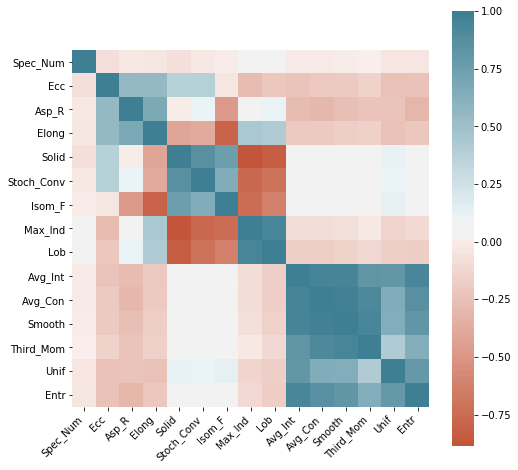

In [10]:
corr = leaf_x.corr()
corr
plt.rcParams['figure.figsize'] = [8,8]
ax = sns.heatmap(corr, square = True, cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

With reference to the correlation plot above, attributes describing texture are strong and positive correlated with themselves. However, texture attributes are weakly correlated with shape attributes but its correlation coefficients are both negative and positive. Correlation between attributes describing shape are more diversified - there are either strong positive/negative or weak positive/negative coefficients. The interesting fact is number of specimens available of each plant is correlated with none feature.

#### Boxplots, histograms and density plots describing attributes

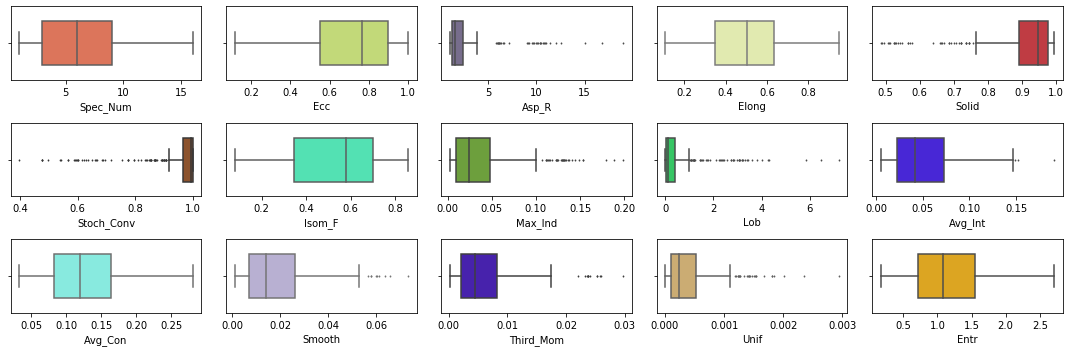

In [11]:
fig, axes = plt.subplots(3,5,figsize=[15,5])
num_cols=leaf_x.select_dtypes(include=np.number).columns
for i, col in enumerate(num_cols):
    sns.boxplot(x=col,color=np.random.rand(3,), data=leaf_x, ax=axes[i//5,i%5],fliersize=1,width=0.6)
plt.tight_layout()

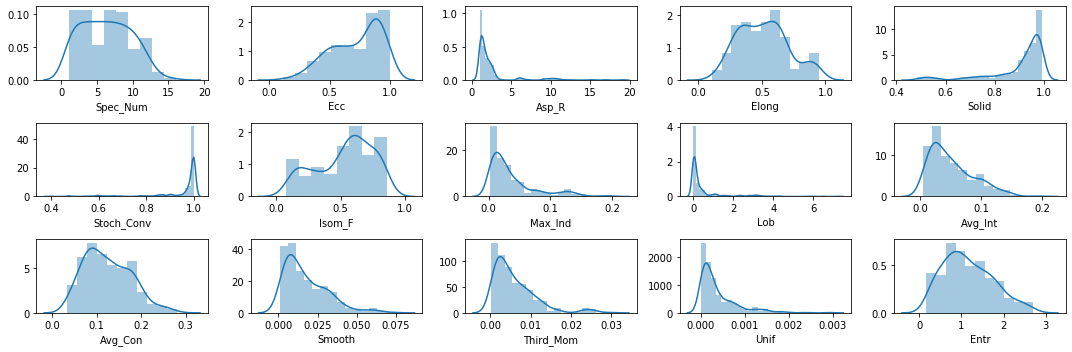

In [12]:
fig, axes = plt.subplots(3,5,figsize=[15,5])
num_cols=leaf_x.select_dtypes(include=np.number).columns
for i, col in enumerate(num_cols):
    sns.distplot(leaf_x[col],ax=axes[i//5,i%5])
plt.tight_layout()

According to the graphs above, we can divide variables into 3 groups:
        
        - its distribution is similar to Normal Distribution (Elongation, Entropy)
        - its distribution is not similar to Normal Distribution and there are some outliers (Aspect Ratio, Solidity,
          Stochastic Convexity, Maximal Indentation Depth, Lobedness, Smoothness, Third moment, Uniformity)
        - its distribution is not similar to Normal Distribution and there is no outliers (Number of specimens, 
          Eccentricity, Isoperimetric Factor, Average Intensity, Average Contrast).
          

## Classification models

#### K-Nearest Neighbors

In KNN method I start with picking a good K Value for further predictions. The parameter K describes how many clusters we should create. Our aim is to find the optimal K Value.

Text(0, 0.5, 'Testing Accuracy')

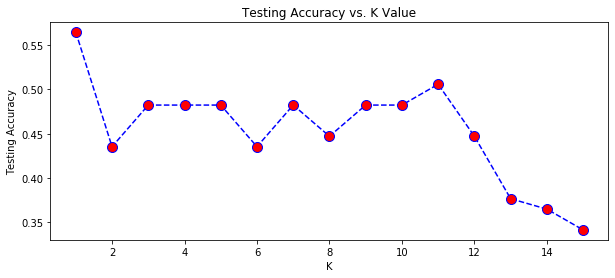

In [13]:
k_range = range(1,16)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.figure(figsize=(10,4))
plt.plot(range(1,16),scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Testing Accuracy')

In the analysis we use 11 clusters - in case we want to create more than 1 cluster the testing accurancy is optimized.

In [14]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
knn_train = knn.score(x_train, y_train)
knn_test = knn.score(x_test, y_test)

print('Accuracy of KNN classifier on training set:', round(knn_train,5))
print('Accuracy of KNN classifier on test set:', round(knn_test,5))

Accuracy of KNN classifier on training set: 0.61569
Accuracy of KNN classifier on test set: 0.50588


#### Linear Discriminant Analysis

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_train = lda.score(x_train, y_train)
lda_test = lda.score(x_test, y_test)

print('Accuracy of LDA classifier on training set:', round(lda_train,5))
print('Accuracy of LDA classifier on test set:', round(lda_test,5))

Accuracy of LDA classifier on training set: 0.87843
Accuracy of LDA classifier on test set: 0.77647


#### Support Vector Machine

In [16]:
svm = SVC()
svm.fit(x_train, y_train)
svm_train = svm.score(x_train, y_train)
svm_test = svm.score(x_test, y_test)

print('Accuracy of SVM classifier on training set:', round(svm_train,5))
print('Accuracy of SVM classifier on test set:', round(svm_test,5))

Accuracy of SVM classifier on training set: 0.73725
Accuracy of SVM classifier on test set: 0.50588


#### Naive Bayes

In Naive Bayes modelling I want to analyze 2 models - Gaussian Naive Bayes and Bernoulli Naive Bayes.

In [17]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_train = gnb.score(x_train, y_train)
gnb_test = gnb.score(x_test, y_test)

print('Accuracy of Gaussian NB classifier on training set:', round(gnb_train,5))
print('Accuracy of Gaussian NB classifier on test set:', round(gnb_test,5), '\n')

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_train = bnb.score(x_train, y_train)
bnb_test = bnb.score(x_test, y_test)

print('Accuracy of Bernoulli NB classifier on training set:', round(bnb_train,5))
print('Accuracy of Bernoulli NB classifier on test set:', round(bnb_test,5))

Accuracy of Gaussian NB classifier on training set: 0.84706
Accuracy of Gaussian NB classifier on test set: 0.64706 

Accuracy of Bernoulli NB classifier on training set: 0.55294
Accuracy of Bernoulli NB classifier on test set: 0.36471


#### Decision Tree Classification

In [18]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc_train = dtc.score(x_train, y_train)
dtc_test = dtc.score(x_test, y_test)
print('Accuracy of Decision Tree classifier on training set:', round(dtc_train,5))
print('Accuracy of Decision Tree classifier on test set:', round(dtc_test,5))

Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 0.57647


#### Random Forests

In RF method I start with picking a good number of estimators. It describes how many iterations is optimal. I assume maximal depth of one iteration in tree is equal to 4.

Text(0, 0.5, 'Testing Accuracy')

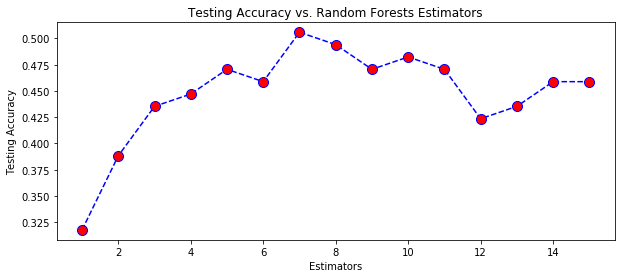

In [19]:
est_range = range(1,16)
scores = []
for k in est_range:
    RF = RandomForestClassifier(n_estimators=k, max_depth=4, random_state=0)
    RF.fit(x_train, y_train)
    scores.append(RF.score(x_test, y_test))

plt.figure(figsize=(10,4))
plt.plot(est_range,scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. Random Forests Estimators')
plt.xlabel('Estimators')
plt.ylabel('Testing Accuracy')

I assume 7 estimators is the most optimal for analysis.

In [20]:
RF = RandomForestClassifier(n_estimators=7, max_depth=4, random_state=0)
RF.fit(x_train, y_train)
RF_train = RF.score(x_train, y_train)
RF_test = RF.score(x_test, y_test)
print('Accuracy of Random Forests classifier on training set:', round(RF_train,5))
print('Accuracy of Random Forests classifier on test set:', round(RF_test,5))

Accuracy of Random Forests classifier on training set: 0.65098
Accuracy of Random Forests classifier on test set: 0.50588


#### Gradient Boosting Classifier

Similar to the method above, I start with picking an optimal number of estimators.

Text(0, 0.5, 'Testing Accuracy')

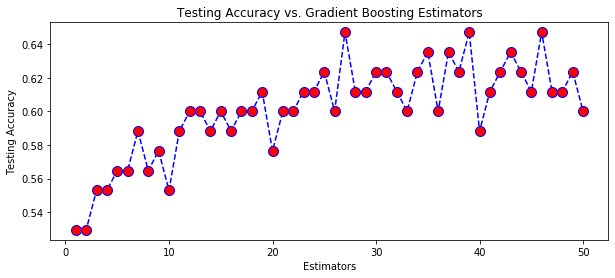

In [21]:
gbc_range = range(1, 51)
scores = []
for k in gbc_range:
    gbc = GradientBoostingClassifier(n_estimators=k)
    gbc.fit(x_train, y_train)
    scores.append(gbc.score(x_test, y_test))

plt.figure(figsize=(10,4))
plt.plot(gbc_range,scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Testing Accuracy vs. Gradient Boosting Estimators')
plt.xlabel('Estimators')
plt.ylabel('Testing Accuracy')

I assume 30 estimators as optimal number. The accurancy value is fluctuacting after each run of model. However, accurancy for 30 and more estimators is more than or equal to 0.6.

In [22]:
gbc = GradientBoostingClassifier(n_estimators=30)
gbc.fit(x_train, y_train)
gbc_train = gbc.score(x_train, y_train)
gbc_test = gbc.score(x_test, y_test)

print('Accuracy of GBC classifier on training set:', round(gbc_train,5))
print('Accuracy of GBC classifier on test set:', round(gbc_test,5))

Accuracy of GBC classifier on training set: 1.0
Accuracy of GBC classifier on test set: 0.61176


## Summary

#### Which model is the most accurate?

In [23]:
classifiers = pd.DataFrame({
                'Model': ['K-Nearest Neighbors', 'Linear Discriminant Analysis', 'Support Vector Machine', 
                          'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Decision Tree Classification', 
                          'Random Forests', 'Gradient Boosting Classifier'],
                'Test Accurancy': [knn_test, lda_test, svm_test, gnb_test, bnb_test, dtc_test, RF_test, gbc_test],
                'Training Accurancy': [knn_train, lda_train, svm_train, gnb_train, bnb_train, dtc_train, RF_train, gbc_train]})

classifiers = classifiers.set_index('Model')
classifiers = classifiers.sort_values(by = 'Test Accurancy', ascending = False)

print(classifiers,'\n')
print(classifiers.index[0], 'algorithm with accurancy on test set', 
      round(classifiers['Test Accurancy'][0]*100,3), '% is the most accurate model I tried.')

                              Test Accurancy  Training Accurancy
Model                                                           
Linear Discriminant Analysis        0.776471            0.878431
Gaussian Naive Bayes                0.647059            0.847059
Gradient Boosting Classifier        0.611765            1.000000
Decision Tree Classification        0.576471            1.000000
K-Nearest Neighbors                 0.505882            0.615686
Support Vector Machine              0.505882            0.737255
Random Forests                      0.505882            0.650980
Bernoulli Naive Bayes               0.364706            0.552941 

Linear Discriminant Analysis algorithm with accurancy on test set 77.647 % is the most accurate model I tried.


#### Confusion matrix

In [24]:
pred = lda.predict(x_test)

print(confusion_matrix(y_test, pred))

[[2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0

#### Classification report

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         4
          13       0.33      1.00      0.50         1
          14       0.33      1.00      0.50         2
          15       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         2
          23       0.50      1.00      0.67         1
          24       0.67    

#### Conclusion

I started the analysis from the introduction to Leaf Dataset - variables description and features explanation. Later I explained what classification in machine learning is and which methods of classification modelling are used. In Cleaning and preprocessing data I checked if there are some NA values, later I splited dataset into Train and Test set and I made feature scaling. In EDA I analyzed correlations between parameters, its distributions and frequency. In Classification models point I prepared models for particular methods used in model accurancy research. It turns out Linear Discriminant Analysis is the most accurate model, the accurance is higher than 75%. Gaussian Naive Bayes, Decision Tree Classification and Gradient Boosting Classifier models also predict properly (accurancy level is more than 60%). It was presented in point Summary together with Confusion matrix and Classification report for LDA model as the most accurate one.